In [1]:
from __future__ import division,print_function,unicode_literals

import numpy as np
import os 

#stable output across runs
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

#supress warning (SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore",message="^internal gelsd")

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1) #Theta_0 = 4 Theta_1 = 3

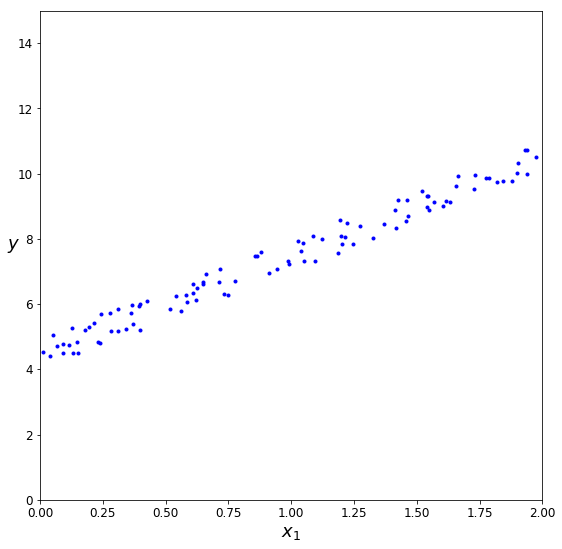

In [3]:
plt.figure(figsize=(9,9))
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [4]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.51359766],
       [2.98323418]])

In [6]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.51359766],
       [10.48006601]])

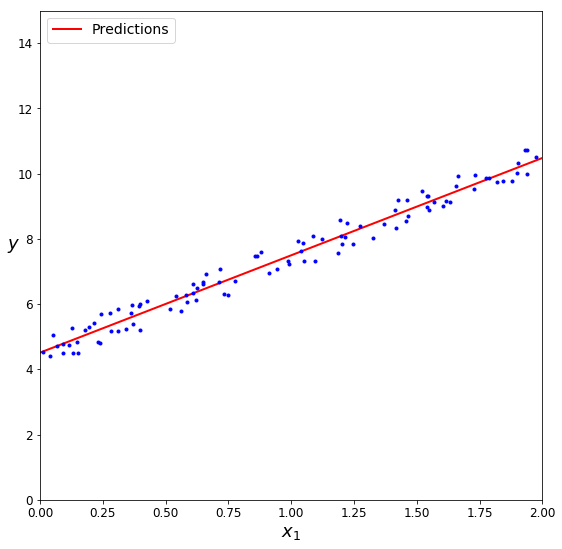

In [7]:
plt.figure(figsize=(9,9))
plt.plot(X_new,y_predict,"r-",linewidth=2,label="Predictions")
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.legend(loc="upper left",fontsize=14)
plt.axis([0,2,0,15])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_,lin_reg.coef_


(array([4.51359766]), array([[2.98323418]]))

In [9]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

In [10]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    


In [11]:
theta

array([[4.51359766],
       [2.98323418]])

In [12]:
theta_path_bgd = []

def plot_gradient_descent(theta,eta,theta_path=None):
    m = len(X_b)
    plt.plot(X,y,"b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new,y_predict,style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$",fontsize=18)
    plt.axis([0,2,0,15])
    plt.title(r"$\eta = {}$".format(eta),fontsize=16)

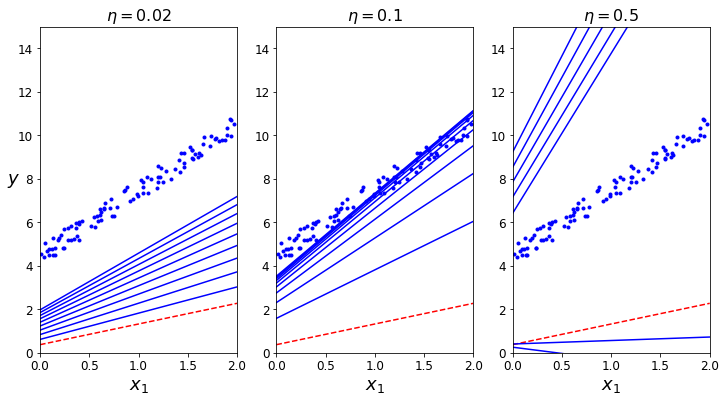

In [13]:
np.random.seed(42)
theta = np.random.rand(2,1)

plt.figure(figsize=(12,6))
plt.subplot(131); plot_gradient_descent(theta,eta=0.02)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.subplot(132);plot_gradient_descent(theta,eta=0.1,theta_path=theta_path_bgd)
plt.subplot(133);plot_gradient_descent(theta,eta=0.5)

plt.show()

In [14]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

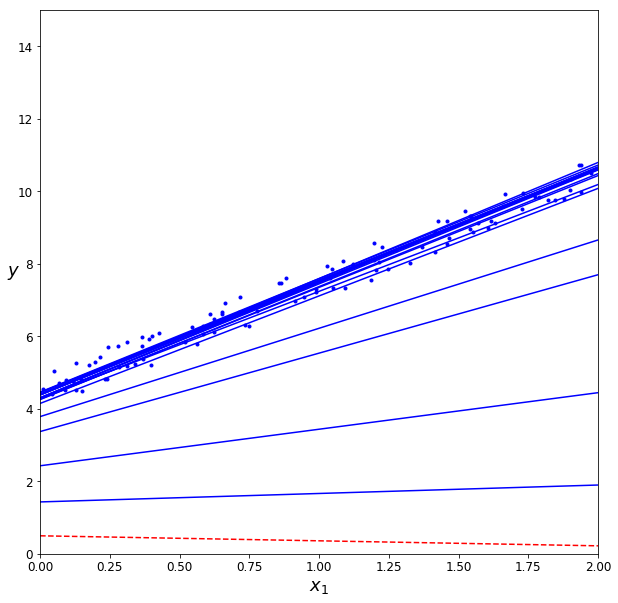

In [15]:
n_epochs = 50 
t0, t1 = 5,50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)
plt.figure(figsize=(10,10))
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new,y_predict,style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) -yi)
        eta = learning_schedule(epoch * m +1)
        theta = theta - eta *gradients
        theta_path_sgd.append(theta)
    
      

plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [16]:
theta

array([[4.51568924],
       [2.97720725]])

In [17]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50,penalty=None,eta0=0.1,random_state=42)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.51388816]), array([2.98206789]))

In [19]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)

t0,t1 = 200,1000
def learning_schedule(t):
    return t0 / (t + t1)

t =0 
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0,m,minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [20]:
theta

array([[4.52651397],
       [2.99723869]])

In [21]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

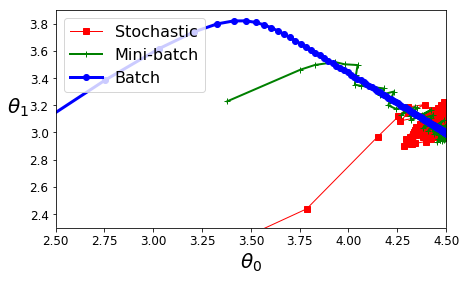

In [22]:

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()



In [23]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [24]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

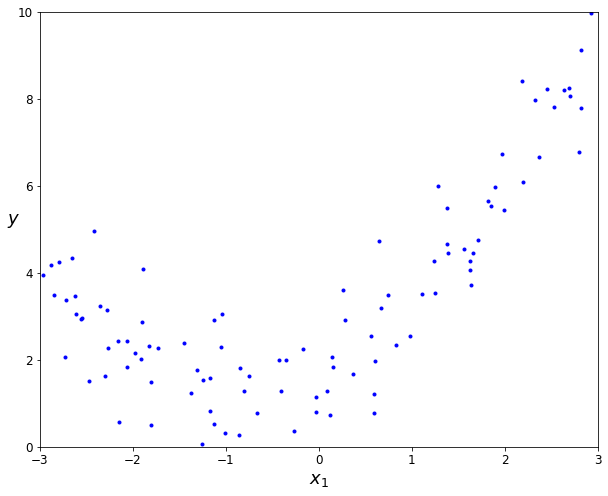

In [25]:
plt.figure(figsize=(10,8))
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([-3,3,0,10])
plt.show()

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [27]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_ 

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

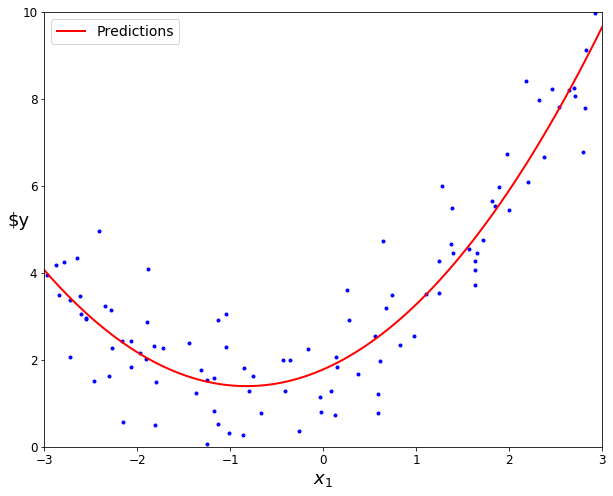

In [29]:
plt.figure(figsize=(10,8))
X_new=np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X,y,"b.")
plt.plot(X_new,y_new,"r-",linewidth=2,label="Predictions")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y",rotation=0,fontsize=18)
plt.legend(loc="upper left",fontsize=14)
plt.axis([-3,3,0,10])
plt.show()

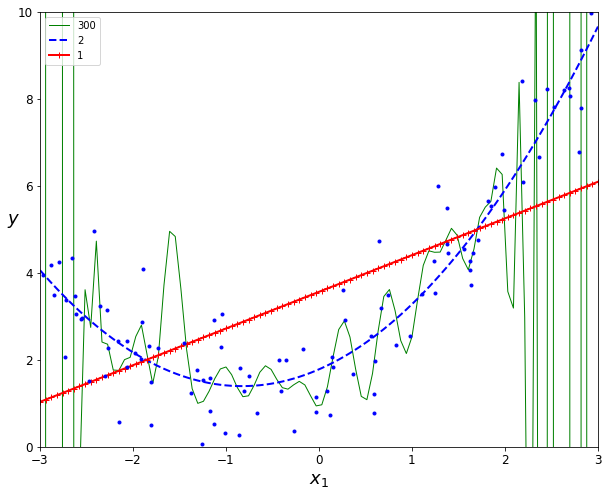

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


plt.figure(figsize=(10,8))

for style,width,degree in (("g-",1,300),("b--",2,2),("r-+",2,1)):
    polybig_features = PolynomialFeatures(degree=degree,include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features",polybig_features),
        ("std_scaler",std_scaler),
        ("lin_reg",lin_reg),
    ])
    polynomial_regression.fit(X,y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new,y_newbig,style,label=str(degree),linewidth=width)
    
plt.plot(X,y,"b.",linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([-3,3,0,10])
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model,x,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)
    train_errors, val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict[:m]))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
       
    plt.figure(figsize=(10,8))
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="Train")
    plt.plot(np.sqrt(val_errors),"b-",linewidth=2,label="Validation")
    plt.legend(loc="upper right",fontsize=14)
    plt.xlabel("Training set size",fontsize=14)
    plt.ylabel("RMSE",fontsize=14)

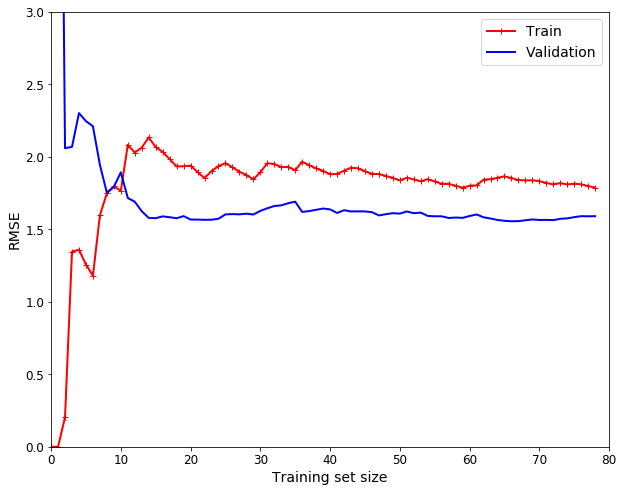

In [32]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg,X,y)
plt.axis([0,80,0,3])
plt.show()

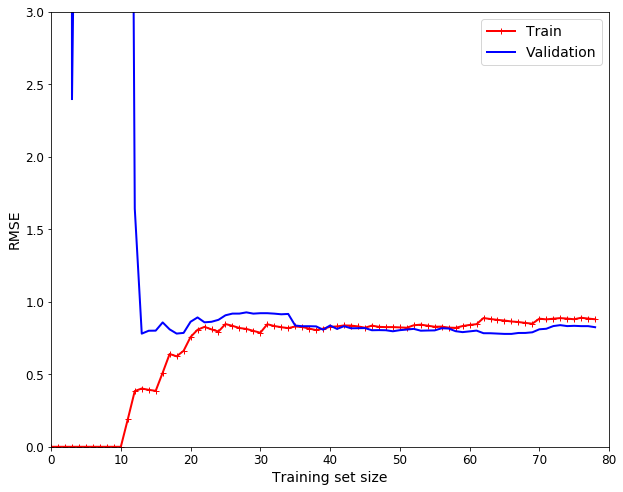

In [33]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg",LinearRegression()),
])

plot_learning_curve(polynomial_regression,X,y)
plt.axis([0,80,0,3])
plt.show()

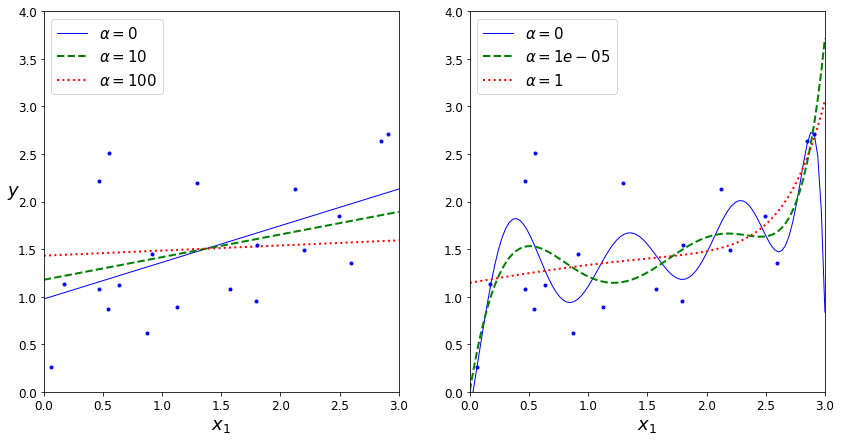

In [44]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m,1)
y = 1 + 0.5 * X + np.random.randn(m,1) /1.5
X_new = np.linspace(0,3,100).reshape(100,1)

def plot_model(model_class,polynomial,alphas,**model_kargs):
    for alpha, style in zip(alphas,("b-","g--","r:")):
        model = model_class(alpha,**model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
                ("std_scaler",StandardScaler()),
                ("regul_reg",model),
            ])
        model.fit(X,y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1 
        plt.plot(X_new,y_new_regul,style,linewidth=lw,label=r"$\alpha = {}$".format(alpha))
    plt.plot(X,y,"b.",linewidth=3)
    plt.legend(loc="upper left",fontsize=15)
    plt.xlabel("$x_1$",fontsize=18)
    plt.axis([0,3,0,4])

plt.figure(figsize=(14,7))
plt.subplot(121)
plot_model(Ridge,polynomial=False,alphas=(0,10,100),random_state=42)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.subplot(122)
plot_model(Ridge,polynomial=True,alphas=(0,10**-5,1),random_state=42)

plt.show()

In [50]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [53]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

C:\Users\B_Majda\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([1.12550589])

In [54]:
ridge_reg = Ridge(alpha=1,solver="sag",random_state=42)
ridge_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.12550589])